In [34]:
import math
import random
import statistics
from scipy import stats as sps
from statsmodels.stats.multicomp import pairwise_tukeyhsd     #для оценки различных моделей и проведения тестов с ними(критерий тьюки - для метода множественных сравнений)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline    

**Задание №1**

In [35]:
x_1 = sps.chi2.rvs(df=15, size = 50)
x_2 = sps.uniform.rvs(loc=5, scale=20, size=100)
x_3 = sps.norm.rvs(loc=5, scale=math.sqrt(2), size=100)

print(x_1[:10])
print()
print(x_2[:10])
print()
print(x_3[:10])

[18.43298865 12.77196987 22.88737958 21.30936463 26.24810986 30.25248811
  9.47590065  8.2540726  15.4704923  10.23390921]

[24.99077033 16.20010718 10.10838643 15.02633229 13.46854586  9.48545831
 15.82031621 24.77396788 10.90134531 12.1933439 ]

[5.16549301 4.05775825 9.19787175 2.19154248 8.60260758 6.26706331
 4.86435677 2.99867898 6.07308164 4.1006582 ]


In [36]:
m_1 = 15
var_1_t = 30

m_2 = (5 + 25) / 2
var_2_t = (25 - 5) ** 2 / 12

m_3 = 5
var_3_t = 2

print('m_1: {:f}'.format(m_1))
print('var_1: {:f}'.format(var_1_t))
print('m_2: {:f}'.format(m_2))
print('var_2: {:f}'.format(var_2_t))
print('m_3: {:f}'.format(m_3))
print('var_3: {:f}'.format(var_3_t))

m_1: 15.000000
var_1: 30.000000
m_2: 15.000000
var_2: 33.333333
m_3: 5.000000
var_3: 2.000000


In [37]:
mean_1 = x_1.mean()
var_1 = x_1.var()
std_1 = x_1.std()
std_1 = x_1.std()
mean_2 = x_2.mean()
var_2 = x_2.var()
std_2 = x_2.std()
mean_3 = x_3.mean()
var_3 = x_3.var()
std_3 = x_3.std()

print('mean_1: {:f}'.format(mean_1))
print('var_1: {:f}'.format(var_1))
print('st_dev_1: {:f}'.format(std_1))
print()
print('mean_2: {:f}'. format(mean_2))
print('var_2: {:f}'.format(var_2))
print('st_dev_2: {:f}'.format(std_2))
print()
print('mean_3: {:f}'.format(mean_3))
print('var_3: {:f}'.format(var_3))
print('st_dev_3: {:f}'.format(std_3))

mean_1: 15.601281
var_1: 31.689094
st_dev_1: 5.629307

mean_2: 15.425819
var_2: 35.128094
st_dev_2: 5.926896

mean_3: 5.076484
var_3: 1.970757
st_dev_3: 1.403837


In [38]:
pooled = np.concatenate([x_1, x_2, x_3])
mean_p = pooled.mean()
var_p = pooled.var()
std_p = pooled.std()

print('mean_p: {:f}'.format(mean_p))
print('var_p: {:f}'.format(var_p))
print('std_p: {:f}'.format(std_p))

mean_p: 11.321177
var_p: 47.178926
std_p: 6.868692


**Задание №2**

Взят уровень значимости a = 0.01

In [39]:
sps.jarque_bera(x_1)

Jarque_beraResult(statistic=6.5276223513829175, pvalue=0.038242371531244546)

In [40]:
sps.jarque_bera(x_2)

Jarque_beraResult(statistic=6.395303027470309, pvalue=0.04085804595226339)

In [41]:
sps.jarque_bera(x_3)

Jarque_beraResult(statistic=2.668013866804662, pvalue=0.2634196388537735)

Так как для всех трёх распределений значение p-value больше чем a, то гипотеза о нормальности распределений принимается

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


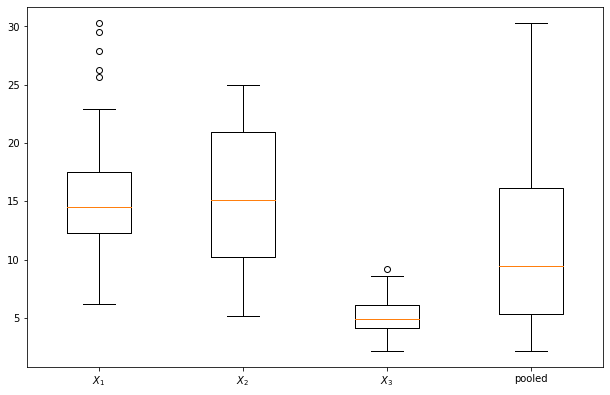

In [84]:
data = [x_1, x_2, x_3, pooled]
fig = plt.figure(figsize =(8, 5))
ax = fig.add_axes([0, 0, 1, 1])   #сreating axes instance
#fig, ax = plt.subplots()
ax.boxplot(data)
plt.xticks([1, 2, 3, 4], ["$X_1$", "$X_2$", "$X_3$", "pooled"])
plt.show()

**Задание №3**

In [43]:
sps.bartlett(x_1, x_2, x_3)

BartlettResult(statistic=164.22850946678074, pvalue=2.1788748384198263e-36)

In [44]:
sps.levene(x_1, x_2, x_3)  #when distributions aren't normal

LeveneResult(statistic=61.93421665833836, pvalue=1.5827773360461232e-22)

Получили, что случайные величины не являются гомоскедастичными

**Задание №4**

In [45]:
n = 250
K = 3
n_1 = 50
n_2 = 100
n_3 = 100

In [46]:
D_b = (n_1 * (mean_1 - mean_p) ** 2 + n_2 * (mean_2 - mean_p) ** 2 + n_3 * (mean_3 - mean_p) ** 2) / n
D_b

26.001567114822492

In [47]:
D_w = (var_1 * n_1 + var_2 * n_2 + var_3 * n_3) / n
D_w

21.177359296548417

In [48]:
D_x = D_w + D_b
D_x

47.17892641137091

In [49]:
unb_est_b = D_b * n / (K - 1)
unb_est_b

3250.1958893528117

In [50]:
unb_est_w = D_w * n / (n - K)
unb_est_w

21.434574186789895

In [51]:
unb_est_x = D_x * n / (n - 1)
unb_est_x

47.368400011416576

In [52]:
eta_sq = D_b / D_x
eta_sq

0.5511267231497595

In [53]:
eta = math.sqrt(D_b / D_x)
eta

0.7423790966546402

По шкале Чеддока при ŋ = 0.768970060233522 получаем, что степень тесноты связи между факторным и результативными признаками высокая (0.7 - 0.9)

In [54]:
sps.f_oneway(x_1, x_2, x_3)

F_onewayResult(statistic=151.633331319262, pvalue=1.0896405147776392e-43)

Дисперсионный анализ является слабо чувствительным (робастным) к требованию о нормальности распределения наблюдаемых случайных величин при больших и сбалансированных объёмах выборок, а при нарушении требования их гомоскедастичности наблюдается рост вероятности ошибки второго рода.

(условие гомоскедастичности в данной работе не выполено)

**Задание №5**

In [55]:
df = pd.DataFrame({'X_1': x_1, 'X_2': x_2[:50], 'X_3': x_3[:50]}) #по 50 сделать
df

,X_1,X_2,X_3
0,18.432989,24.990770,5.165493
1,12.771970,16.200107,4.057758
2,22.887380,10.108386,9.197872
3,21.309365,15.026332,2.191542
4,26.248110,13.468546,8.602608
5,30.252488,9.485458,6.267063
6,9.475901,15.820316,4.864357
7,8.254073,24.773968,2.998679
8,15.470492,10.901345,6.073082
9,10.233909,12.193344,4.100658


In [56]:
data = df.stack().reset_index()
data

,level_0,level_1,0
0,0,X_1,18.432989
1,0,X_2,24.990770
2,0,X_3,5.165493
3,1,X_1,12.771970
4,1,X_2,16.200107
...,...,...,...
145,48,X_2,14.347026
146,48,X_3,3.696745
147,49,X_1,16.744023
148,49,X_2,13.009467


In [57]:
data = data.rename(columns={"level_0": "id", "level_1": "group", 0: "score"})
data

,id,group,score
0,0,X_1,18.432989
1,0,X_2,24.990770
2,0,X_3,5.165493
3,1,X_1,12.771970
4,1,X_2,16.200107
...,...,...,...
145,48,X_2,14.347026
146,48,X_3,3.696745
147,49,X_1,16.744023
148,49,X_2,13.009467


In [58]:
tukey_comp = pairwise_tukeyhsd(endog=data["score"], groups=data["group"], alpha=0.05)
print(tukey_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   X_1    X_2   0.8524 0.6353  -1.4137  3.1186  False
   X_1    X_3  -10.619  0.001 -12.8851 -8.3529   True
   X_2    X_3 -11.4715  0.001 -13.7376 -9.2053   True
-----------------------------------------------------


In [60]:
def linear_contrast_method(x, y, alpha):
  c = x.mean() - y.mean()
  sigma_sq = (n * D_w / (n - K)) * (1 / len(x) + 1/len(y))
  kv_f = sps.f(K - 1, n - K).ppf(1 - alpha)
  lower = c - math.sqrt(sigma_sq * (K - 1) * kv_f)
  upper = c + math.sqrt(sigma_sq * (K - 1) * kv_f)
  return lower, upper

In [61]:
alpha = 0.05

In [64]:
a_1, b_1 = linear_contrast_method(x_1, x_2, alpha)
a_1, b_1

(-1.7993391599895137, 2.1502646920286734)

In [65]:
a_2, b_2 = linear_contrast_method(x_1, x_3, alpha)
a_2, b_2

(8.549995261166394, 12.49959911318458)

In [66]:
a_3, b_3 = linear_contrast_method(x_2, x_3, alpha)
a_3, b_3

(8.736915400559992, 11.961753441751819)

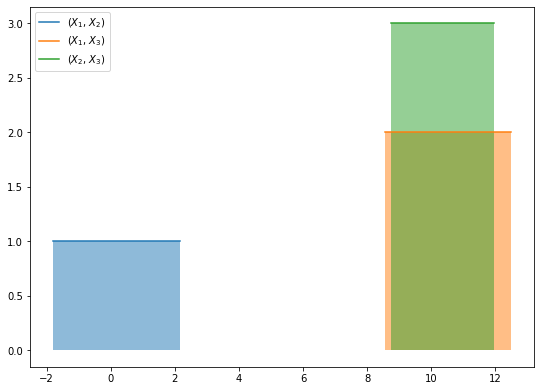

In [80]:
fig = plt.figure(figsize =(7, 5))
ax = fig.add_axes([0, 0, 1, 1])
#fig, ax = plt.subplots()
ax.plot([a_1, b_1], [1, 1], label="($X_1$, $X_2$)")
ax.plot([a_2, b_2], [2, 2], label="($X_1$, $X_3$)")
ax.plot([a_3, b_3], [3, 3], label="($X_2$, $X_3$)")
ax.fill_between([a_1, b_1], [1, 1], alpha=0.5)
ax.fill_between([a_2, b_2], [2, 2], alpha=0.5)
ax.fill_between([a_3, b_3], [3, 3], alpha=0.5)
plt.legend()
plt.show()